In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [10]:
data_cleaned = data.drop('CustomerID', axis=1)
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 1, 'Female': 0})
data_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


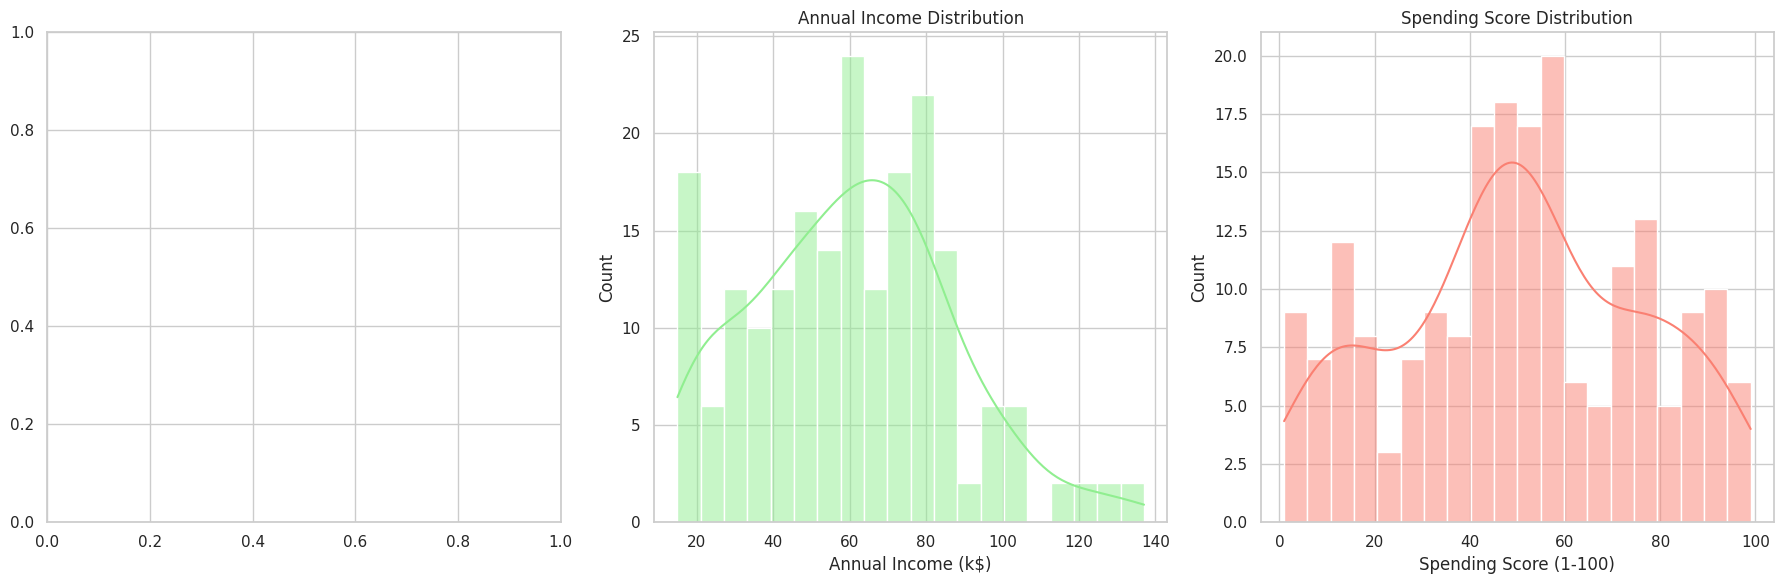

In [11]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data_cleaned['Annual Income (k$)'], bins=20, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Annual Income Distribution')
sns.histplot(data_cleaned['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

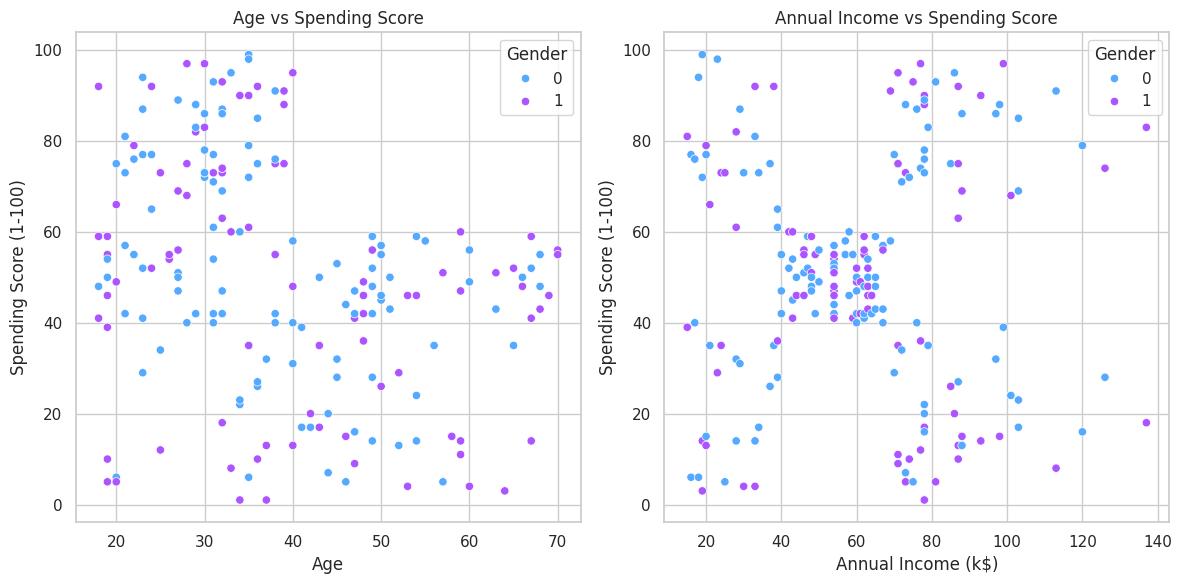

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', palette='cool', data=data_cleaned, ax=axes[0])
axes[0].set_title('Age vs Spending Score')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='cool', data=data_cleaned, ax=axes[1])
axes[1].set_title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

In [13]:
data_cleaned.to_csv('data_cleaned.csv', index=False)